In [1]:
#シミュレーション可視化のための３Dアニメーション作成スクリプト
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm_notebook as tqdm

In [2]:
#マルチコプタ３Dデータ

#座標系（右手系）
# X軸　前
# Y軸　左
# Z軸　上

prop_r=25.4*6/1000/2
copter_L=0.18
frame_l=copter_L*np.sqrt(2)+0.03
frame_l_hf=frame_l/2
frame_w=0.03
frame_w_hf=frame_w/2
prop_loc_z=0.02

#フレームのデータ
_frame_x=np.array([ frame_l_hf, frame_w_hf, frame_w_hf,\
                  -frame_w_hf,-frame_w_hf,-frame_l_hf,\
                  -frame_l_hf,-frame_w_hf,-frame_w_hf,\
                   frame_w_hf, frame_w_hf, frame_l_hf,\
                   frame_l_hf])

_frame_y=np.array([ frame_w_hf, frame_w_hf, frame_l_hf,\
                   frame_l_hf, frame_w_hf, frame_w_hf,\
                  -frame_w_hf,-frame_w_hf,-frame_l_hf,\
                  -frame_l_hf,-frame_w_hf,-frame_w_hf,\
                   frame_w_hf])
frame_x=_frame_x*np.cos(-np.pi/4)-_frame_y*np.sin(-np.pi/4)
frame_y=_frame_x*np.sin(-np.pi/4)+_frame_y*np.cos(-np.pi/4)
frame_z=np.zeros(len(frame_x))

#プロペラのデータ
N=32
th=np.linspace(0, 2*np.pi, N)
prop_x=prop_r*np.cos(th)
prop_y=prop_r*np.sin(th)
prop_z=np.zeros(N)

#各プロペラごとのデータ
prop_fr_x=prop_x+copter_L/2
prop_fr_y=prop_y-copter_L/2
prop_fr_z=prop_z+prop_loc_z

prop_fl_x=prop_x+copter_L/2
prop_fl_y=prop_y+copter_L/2
prop_fl_z=prop_z+prop_loc_z

prop_rr_x=prop_x-copter_L/2
prop_rr_y=prop_y-copter_L/2
prop_rr_z=prop_z+prop_loc_z

prop_rl_x=prop_x-copter_L/2
prop_rl_y=prop_y+copter_L/2
prop_rl_z=prop_z+prop_loc_z

#マルチコプタ全体（
#パーツ(ポリゴン)ごとの物体リスト
copter1=((frame_x, frame_y, frame_z, 'c'),\
        (prop_fr_x, prop_fr_y, prop_fr_z, 'b'),\
        (prop_fl_x, prop_fl_y, prop_fl_z, 'b'),\
        (prop_rr_x, prop_rr_y, prop_rr_z, 'r'),\
        (prop_rl_x, prop_rl_y, prop_rl_z, 'r') )

sankaku1_x=np.array([0,0,0,0])
sankaku1_y=np.array([-0.1,0,0.1,-0.1])
sankaku1_z=np.array([0,0.2,0,0])

sankaku2_x=np.array([0.0,0.0,0.2,0.0])
sankaku2_y=np.array([0.1,0.0,0.0,0.1])
sankaku2_z=np.array([0.0,0.2,0.1,0.0])

sankaku3_x=np.array([0.0,0.0,0.2,0.0])
sankaku3_y=np.array([-0.1,0.0,0.0,-0.1])
sankaku3_z=np.array([0.0,0.2,0.1,0.0])


copter2=((sankaku1_x,sankaku1_y,sankaku1_z,'g'),\
         (sankaku2_x,sankaku2_y,sankaku2_z,'r'),\
         (sankaku3_x,sankaku3_y,sankaku3_z,'b'))\


copter=copter2



In [3]:
#3D計算＋透視変換用関数ライブラリ

#回転座標変換（機体->地球）
def rot(euler,p):
    phi=euler[0]
    theta=euler[1]
    psi=euler[2]
    x1=p[0]
    y1=p[1]
    z1=p[2]
    
    e11= np.cos(theta)*np.cos(psi)
    e12= np.cos(theta)*np.sin(psi)
    e13=-np.sin(theta)
    
    e21= np.sin(phi)*np.sin(theta)*np.cos(psi) - np.cos(phi)*np.sin(psi)
    e22= np.sin(phi)*np.sin(theta)*np.sin(psi) + np.cos(phi)*np.cos(psi)
    e23= np.sin(phi)*np.cos(theta)
    
    e31= np.cos(phi)*np.sin(theta)*np.cos(psi) + np.sin(phi)*np.sin(psi)
    e32= np.cos(phi)*np.sin(theta)*np.sin(psi) - np.sin(phi)*np.cos(psi)
    e33= np.cos(phi)*np.cos(theta)
    
    x2=e11*x1 + e12*y1 + e13*z1
    y2=e21*x1 + e22*y1 + e23*z1
    z2=e31*x1 + e32*y1 + e33*z1
    
    
    return (x2,y2,z2)

#回転座標変換（地球->機体）
def invrot(euler, p):
    phi=euler[0]
    theta=euler[1]
    psi=euler[2]
    x1=p[0]
    y1=p[1]
    z1=p[2]
    
    e11= np.cos(theta)*np.cos(psi)
    e12= np.cos(theta)*np.sin(psi)
    e13=-np.sin(theta)
    
    e21= np.sin(phi)*np.sin(theta)*np.cos(psi) - np.cos(phi)*np.sin(psi)
    e22= np.sin(phi)*np.sin(theta)*np.sin(psi) + np.cos(phi)*np.cos(psi)
    e23= np.sin(phi)*np.cos(theta)
    
    e31= np.cos(phi)*np.sin(theta)*np.cos(psi) + np.sin(phi)*np.sin(psi)
    e32= np.cos(phi)*np.sin(theta)*np.sin(psi) - np.sin(phi)*np.cos(psi)
    e33= np.cos(phi)*np.cos(theta)
    
    x2=e11*x1 + e21*y1 + e31*z1
    y2=e12*x1 + e22*y1 + e32*z1
    z2=e13*x1 + e23*y1 + e33*z1
    
    
    return [x2,y2,z2]

#平行移動
def tr(mv, p):
    x1=p[0]
    y1=p[1]
    z1=p[2]
    dx=mv[0]
    dy=mv[1]
    dz=mv[2]
    
    x2=x1+dx
    y2=y1+dy
    z2=z1+dz
    
    return [x2, y2, z2]


#平行移動＋回転移動
def move_obj(obj, move , angle):
    _obj=[]
    for part in obj:
        #print(part,'*')
        #part=list(part)
        _part=invrot(angle, part)
        _part=tr(move, _part)
        _part.append(part[-1])
        _obj.append(_part)
    return _obj,len(_obj)

#透視変換＋カメラ座標への座標変換
def perspective(obj, f):
    _obj=[]
    for part in obj:
        #part=list(part)
        x1=part[0]
        y1=part[1]
        z1=part[2]
        
        #暫定版カメラ座標系に座標変換
        xc=y1
        yc=z1
        zc=x1
    
        u= -f*xc/zc
        v=  f*yc/zc
        _obj.append((u,v,x1,part[-1]))
    
    return _obj

#objaの方が近いか近くないかの判断
def judge_near(obja, objb):
    ax=0
    za=obja[ax]
    zb=objb[ax]
    zamin=min(za)
    zbmin=min(zb)
    if zamin<zbmin:
        return True #objaの方が近い
    else:
        return False #objbの方が遠い

#物体リストを遠いものが頭にくる様に並び替える（バブルソート）
def sort_obj(obj):
    _obj=list(obj)
    N=len(_obj)
    for j in range(N-2,0,-1):
        for  i in range(j):
            if judge_near(_obj[i],_obj[i+1]):
                dummy=_obj[i]
                _obj[i]=_obj[i+1]
                _obj[i+1]=dummy
    return _obj 


#物体の２D画面への描画    
def draw_obj(obj, move, angle, f,axis):
    _obj,n = move_obj(obj, move , angle)
    _obj=sort_obj(_obj)
    copter_2d=perspective(_obj, f)
    for part in copter_2d:
        x=part[0]
        y=part[1]
        c=part[3]
        axis.plot(x,y,color=c, lw=3)
        

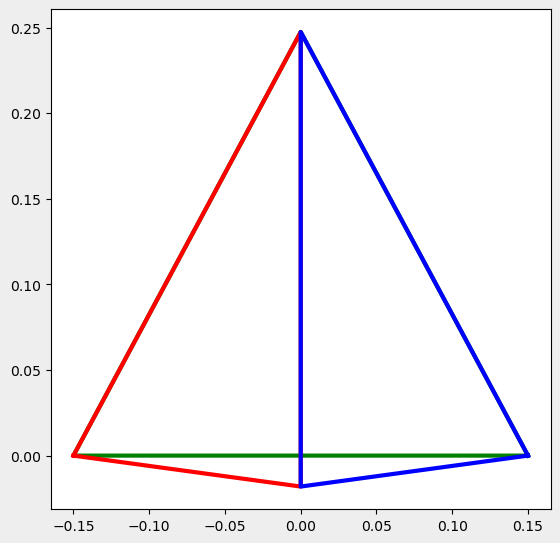

In [4]:
fig=plt.figure(figsize=(5,5),facecolor='#EEEEEE',dpi=100)
ax=fig.add_subplot()
ax.set_position([0, 0, 1, 1])
draw_obj(copter, (2,0,0),(0,np.pi/6,0),3,ax)
plt.show()
plt.close()

In [5]:
#アニメーション作成関数ライブラリ

def draw_animation_frame(copter, move, angle, f, prop_loc_z, index):
    fig=plt.figure(figsize=(19.20,10.80),facecolor='#EEEEEE',dpi=100)
    ax=fig.add_subplot()
    ax.set_position([0, 0, 1, 1])
    ax.axis("off")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2*1080/1920, 2*1080/1920)

    draw_obj(copter, move, angle, f, ax)

    plt.savefig('anim_img/anim_frame{:04d}'.format(index))
    #plt.show()
    plt.close()
    

def make_animation(copter, move, angles, index0):
    index=index0;
    for phi,theta,psi,x,y,z in tqdm(\
                    zip(angles[0], angles[1], angles[2],move[0],move[1],move[2]),\
                    total=len(angles[0])):
        angle=(phi,theta,psi)
        move=(x,y,z)
        f=3.5

        draw_animation_frame(copter, move, angle, f, 0.02,index)

        index=index+1
    return index


In [14]:
#メイン
#動き生成してアニメ作成関数を呼ぶ

t=np.linspace(0,3,72)
mv=np.sin(2*np.pi*t/3)
phi=np.linspace(0,360*np.pi/180,24*3)
theta=np.linspace(0,360*np.pi/180,24*3)
psi=np.linspace(0,360*np.pi/180,24*3)
zero=np.zeros(24*3)

index=0
index=make_animation(copter,(2+zero,0.8*mv,zero),(phi,zero,zero), index)
index=make_animation(copter,(2+1.5*mv,zero,zero),(zero,theta,zero), index)
index=make_animation(copter,(2+zero,zero,0.5*mv),(zero,zero,psi), index)


  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

In [15]:
#ffmpegを使い　MP4ファイル生成
import os
import ffmpeg as fp

filename='sankaku_animation.mp4'

try:
    os.remove(filename)
except:
    print('Not found {:s}'.format(filename))
stream = fp.input('anim_img/anim_frame%04d.png')
stream = fp.output(stream, filename,\
                   r=24,\
                   vcodec='libx264',\
                   pix_fmt='yuv420p',\
                   loglevel='quiet')
r=fp.run(stream)
print('Finish to create MP4 file. ')

Finish to create MP4 file. 
